# Solution 1

## Problem 1 

1) 

By definition, for any $x \in \mathbb{R}^n$

$$\begin{align*}
P\left(Px\right) &= Px\\
P^2x &= Px\\
\left(P^2 - P\right)x &= 0
\end{align*}$$

2)

<img src="./image_files/Solution01.png", width = 250>

By definition, for any $x, y \in \mathbb{R}^n$

$$\left(Px - Py\right) \perp \left(y-Py\right)$$

Consequently,

$$0 = \left(Px - Py\right)^T\left(y-Py\right) = \left(x-y\right)^Tp^T\left(I-P\right)y = \left(x-y\right)^T\left(P^T-P^TP\right)y=0$$

for any $x, y \in \mathbb{R}^n$ This shows that $P^T = P^TP$. Then, $P = \left(P^T\right)^T =  \left(P^TP\right)^T = P^TP = P^T$ 

## Problem 2

If $X_1$ and $X_2$ are any points on the hyperplane, then

$$\begin{align*}
g(X_1) = \omega^TX_1 + b = 0\\
g(X_2) = \omega^TX_2 + b = 0
\end{align*}
\text{ are satisfied.}$$

We can show that

$$g(X_1) - g(X_2) = \omega^TX_1 - \omega^TX_2 = \omega^T(X_1 - X_2) = 0 \implies \omega \perp (X_1 - X_2)$$

## Problem 3

1)

Suppose $f(X_1) = Z_1, f(X_2) = Z_2$ where $f$ is a reflection.

> 1) $f(\alpha x_1) = \alpha f(x_1)$

> 2) $f(x_1 + x_2) = f(x_1) + f(x_2)$

<img src="./image_files/Solution02.png", width = 250>

Think about the geometric definition of a reflection. We can easily show that it is a linear transformation.

2)

<img src="./image_files/Solution03.png", width = 250>


$$\begin{align*}
\text{We learned}\\
\omega &= PX = \frac{v^Tx}{v^Tv}v = \frac{vv^T}{v^Tv}X\\
z &= x = 2(\omega - x) = 2\omega -x\\
&= \left( 2\frac{vv^T}{v^Tv} - I \right)X = MX
\end{align*}$$

3)

$$\begin{align*}
V = \begin{bmatrix}1\\ 1\end{bmatrix}\\
M = 2\frac{\begin{bmatrix}1\\ 1 \end{bmatrix}\begin{bmatrix}1&1\end{bmatrix}}{\begin{bmatrix}1& 1 \end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix}} - \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\end{align*}$$

$$\text{ Can you come up with a reflection transformation by just looking at matrix }\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} ?$$

<img src="./image_files/Solution04.png", width = 250>

$$\begin{align*}
\text{if } x = \begin{bmatrix} x_1\\ x_2 \end{bmatrix} &\implies Z = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} x_1\\ x_2 \end{bmatrix} = \begin{bmatrix} x_2\\ x_1 \end{bmatrix}\\
Mx = \lambda x &\implies \left(M - \lambda I \right)x = 0\\
\text{det} \begin{bmatrix}-\lambda & 1 \\ 1 & -\lambda \end{bmatrix} &= \lambda^2 - 1 = 0 \implies \lambda = \pm 1
\end{align*}$$

$$\begin{align*}
\text{For } \lambda_1 = 1, x_1 &= \begin{bmatrix}1 \\ 1 \end{bmatrix}\\
\text{For } \lambda_2 = -1, x_2 &= \begin{bmatrix}1 \\ -1 \end{bmatrix}\\
\end{align*}$$

$$\implies \text{think about these two eigenvectors with a reflection transformation}$$


## Problem 4

$$\begin{align*}
&f(\alpha u + \beta \omega)\\
=&\frac{(\alpha u + \beta \omega)^Ty}{\lVert y \rVert^2}y\\
=&\alpha \frac{u^Ty}{\lVert y\rVert^2}y + \beta\frac{w^Ty}{\lVert y\rVert^2}y\\
=&\alpha f(u) + \beta f(w) \leftarrow \text{Linear}\\
&A = (y^Ty)^{-1}y^T
\end{align*}$$

## Problem 5

(a) 
$$f(x) = (2x_1 - 1)^2 + (-x_1 + x_2)^2 + (2x_2 + 1)^2$$

$$\begin{align*}
\frac{\partial f(x)}{\partial x_1} = 4(2x_1 - 1) -2(x_1 + x_2) = 0\\
\frac{\partial f(x)}{\partial x_2} = 2(-x_1 + x_2) + 4(2x_2 + 1) = 0
\end{align*}$$

$$\begin{align*}
10x_1 - 2x_2 = 4\\
-2x_1 + 10x_2 = -4\\
\hat x = (-\frac{1}{3}, \frac{1}{3})
\end{align*}$$
(b)
```octave
A = [2 0; -1 1;0 2];
b = [1 0 -1]';

cvx_begin quiet
    variable x(2,1)
    minimize norm(A*x - b,2)
cvx_end

disp(x)
```



## Problem 6

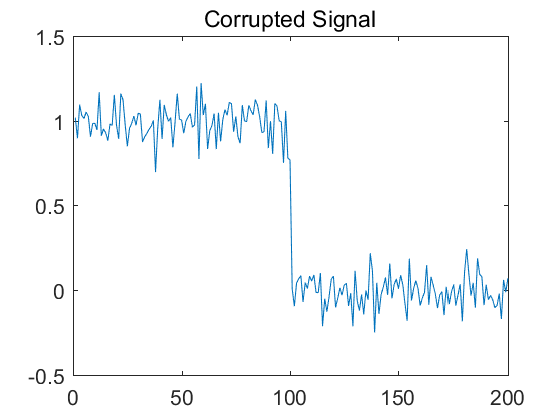

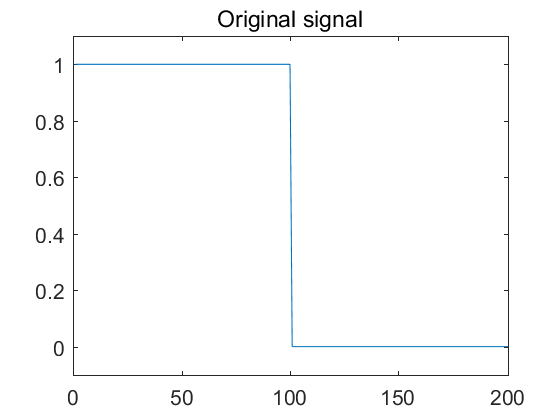

In [2]:
% step 1

x = [ones(1,100) zeros(1,100)]';
figure(1)
plot(x),    ylim([-0.1 1.1])
title('Original signal')

x_corrupt = x + 0.1*randn(200,1);

figure(2)
plot(x_corrupt),    title('Corrupted Signal')


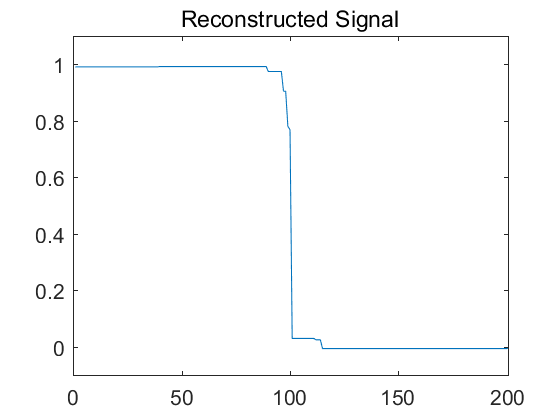

In [3]:
% step 2

beta = 1;
cvx_begin quiet
    variable x_con(200)
    minimize ( norm(x_con - x_corrupt,2) )
    subject to
        norm(x_con(2:200) - x_con(1:199),1) <= beta;
cvx_end

figure(3)
plot(x_con),    ylim([-0.1 1.1])
title('Reconstructed Signal')

## Problem 7

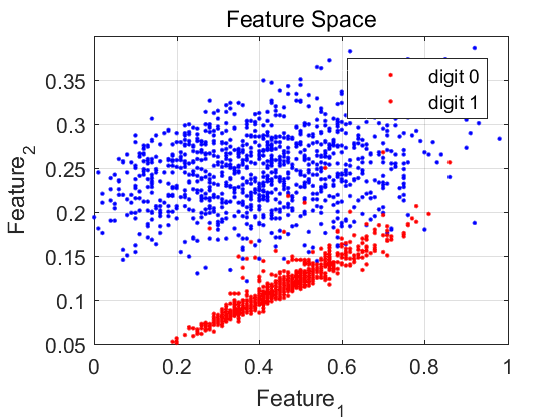

In [4]:
clear all; close all; clc;

phi = [];

fid = fopen('data0','r');
for i = 1:1000
    [image,N] = fread(fid,[28 28],'uchar');
  
    % Convert to binary image
    %image = image > 125;
    image = im2bw(image);
    
    % Average pixels locaed at the center of the image
    feature1 = sum(sum(image(10:19,10:19)))/100;
    
    % Total average pixels over the entire location
    feature2 = sum(sum(image))/28^2;
    
    phi = [phi; feature1, feature2 1];    
end;
%%
fid = fopen('data1','r');
for i = 1:1000
    [image,N] = fread(fid,[28 28],'uchar');

    %image = image > 125;
    image = im2bw(image);
    
    feature1 = sum(sum(image(10:19,10:19)))/100;

    feature2 = sum(sum(image))/28^2;
    
    phi = [phi; feature1, feature2 1];    
end
fclose('all');

figure(1); hold on
title('Feature Space')
scatter(phi(1:1000,1),phi(1:1000,2),'b.')
scatter(phi(1001:2000,1),phi(1001:2000,2),'r.')
xlabel('Feature_1')
ylabel('Feature_2')
legend('digit 0','digit 1')
grid on,    box on


## Problem 8

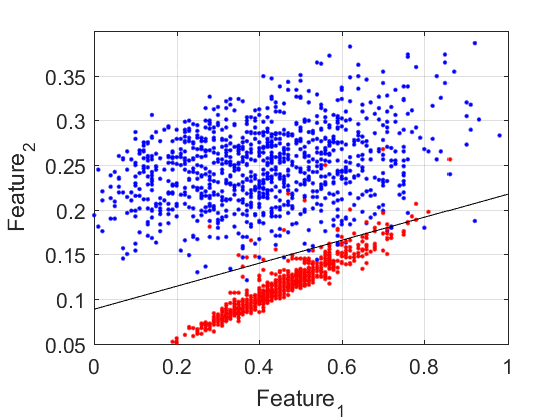

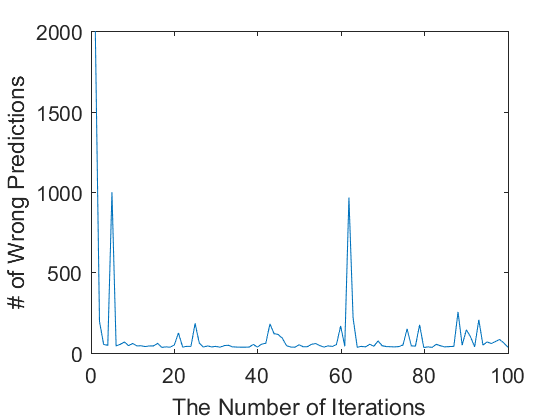

In [8]:
% Initialize w
w = [0 0 0]';
label = [ones(1,1000) -ones(1,1000)]';

% Store number of correct predictions in cp
cp = [];
W = [];
for j = 1:100    
    cp = [cp sum(sign(phi*w) == label)];

    W = [W w];
    
    for i = 1:200
        k = randi([1,2000],1);
        yhat = sign(phi(k,:)*w);
        if yhat ~= label(k)
            w = w + label(k)*phi(k,:)';
        end
    end  
end

figure(2),  clf
plot(2000 - cp)
xlabel('The Number of Iterations')
ylabel('# of Wrong Predictions')

t = linspace(0,1);
f = -w(1)/w(2)*t - w(3)/w(2);

figure(3); clf, hold on
scatter(phi(1:1000,1),phi(1:1000,2),'b.')
scatter(phi(1001:2000,1),phi(1001:2000,2),'r.')
plot(t,f,'k')
xlabel('Feature_1')
ylabel('Feature_2')
grid on,    box on, hold off

## Problem 9

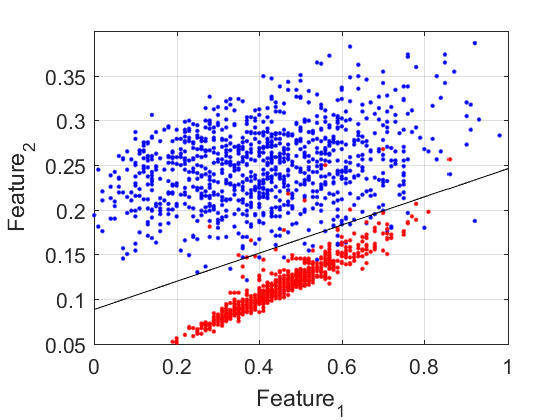

In [10]:
X = phi(1:1000,:);
Y = phi(1001:2000,:);
g = 1;

cvx_begin quiet
    variables w(3) u(1000) v(1000)
    minimize (norm(w,2) + g*(ones(1,1000)*u + ones(1,1000)*v))
    subject to
        X*w >= 1 - u;
        Y*w <= -(1 -v);
        u >= 0;
        v >= 0;
cvx_end

t = linspace(0,1);
f = -w(1)/w(2)*t - w(3)/w(2);

figure(4); hold on
scatter(phi(1:1000,1),phi(1:1000,2),'b.')
scatter(phi(1001:2000,1),phi(1001:2000,2),'r.')
plot(t,f,'k')
xlabel('Feature_1')
ylabel('Feature_2')
grid on,    box on